<a href="https://colab.research.google.com/github/Niguzmang/AlgorithmsUN2021II/blob/main/Lab16/AlgorithmicToolboxWeek6Group9_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algorithmic Toolbox Week 6: Dynamic Programming 2

## 6-1: Maximum Amount of Gold

In [ ]:
W, n = list(map(int, input().split()))
w = list(map(int, input().split()))

v = [[0]*(len(w)+1) for _ in range(W+1)]

for i in range(1,len(w)+1):
    for j in range(1,W+1):
        v[j][i] = v[j][i-1]
        if w[i-1] <= j:
            val = v[j-w[i-1]][i-1] + w[i-1]
            if val >= v[j][i]:
                v[j][i] = val

print(v[W][len(w)])

10 3
1 4 8
9


## 6-2: Partitioning Souvenirs

In [ ]:
import numpy

n = int(input())
iw = list(map(int, input().split()))
tw = sum(iw)

if n<3: 
    print('0')

elif tw % 3 != 0:
    print('0')

else:

    W = tw//3

    count = 0 
    value = numpy.zeros((W+1, n+1))
    for i in range(1, W+1):
        for j in range(1, n+1):
            value[i][j] = value[i][j-1]
            if iw[j-1]<=i:
                temp = value[i-iw[j-1]][j-1] + iw[j-1]
                if temp > value[i][j]:
                    value[i][j] = temp
            if value[i][j] == W:
                count += 1

    if count < 3:
        print('0')
    else:
        print('1')

3
1 1 1
1


## 6-3: Maximum Value of an Arithmetic Expression

In [ ]:
import math
def calc(a, b, op):

    if op == '+':
        return a + b
    elif op == '-':
        return a - b
    else:
        return a * b


def MinAndMax(M, m, i, j, operators):

    min_value = math.inf
    max_value = -math.inf
    for k in range(i, j):
        a = calc(M[i][k], M[k+1][j], operators[k])
        b = calc(M[i][k], m[k+1][j], operators[k])
        c = calc(m[i][k], M[k+1][j], operators[k])
        d = calc(m[i][k], m[k+1][j], operators[k])
        min_value = min(min_value, a, b, c, d)
        max_value = max(max_value, a, b, c, d)
    return min_value, max_value


def get_maximum_value(operands, operators):

    n = len(operands)
    m = [[None for x in range(n)] for x in range(n)]
    M = [[None for x in range(n)] for x in range(n)]

    for i in range(n):
        m[i][i] = operands[i]
        M[i][i] = operands[i]

    for s in range(1, n):
        for i in range(0, n-s):
            j = i + s
            m[i][j], M[i][j] = MinAndMax(M, m, i, j, operators)

    return M[0][n-1]


if __name__ == "__main__":
    expression = input()
    operators, operands = [], []

    for i in expression:
        if i in ['+', '-', '*']:
            operators.append(i)
        else:
            operands.append(int(i))

    print(get_maximum_value(operands, operators))

1+2-3*4-5
6


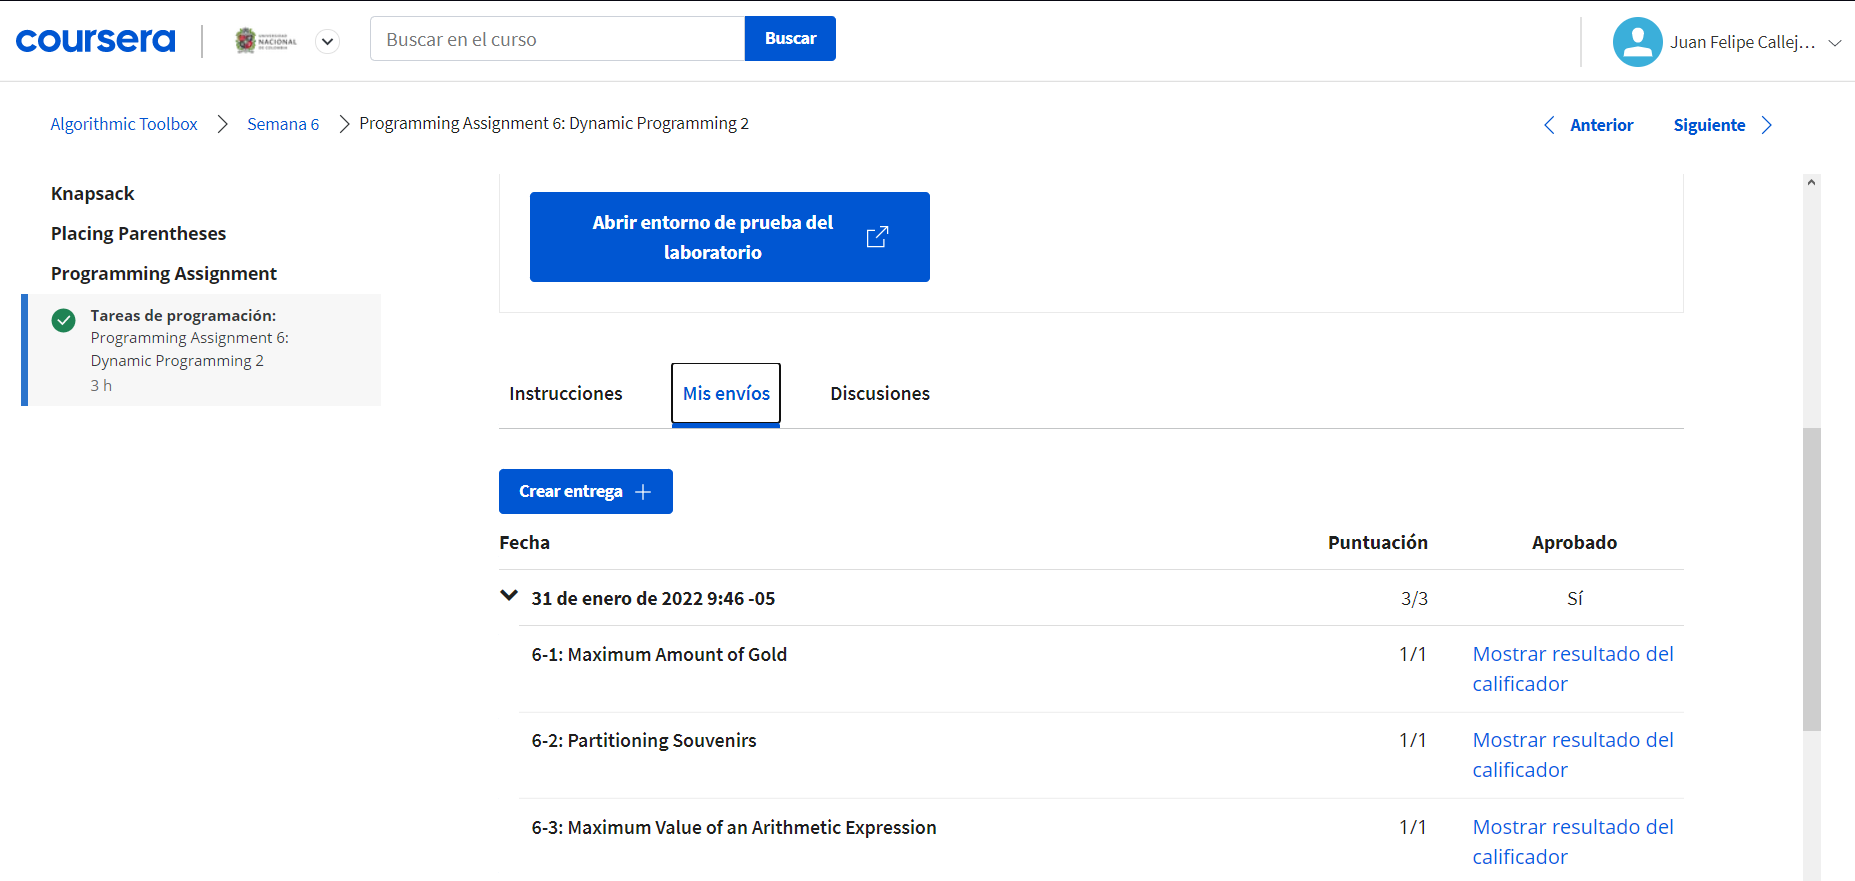

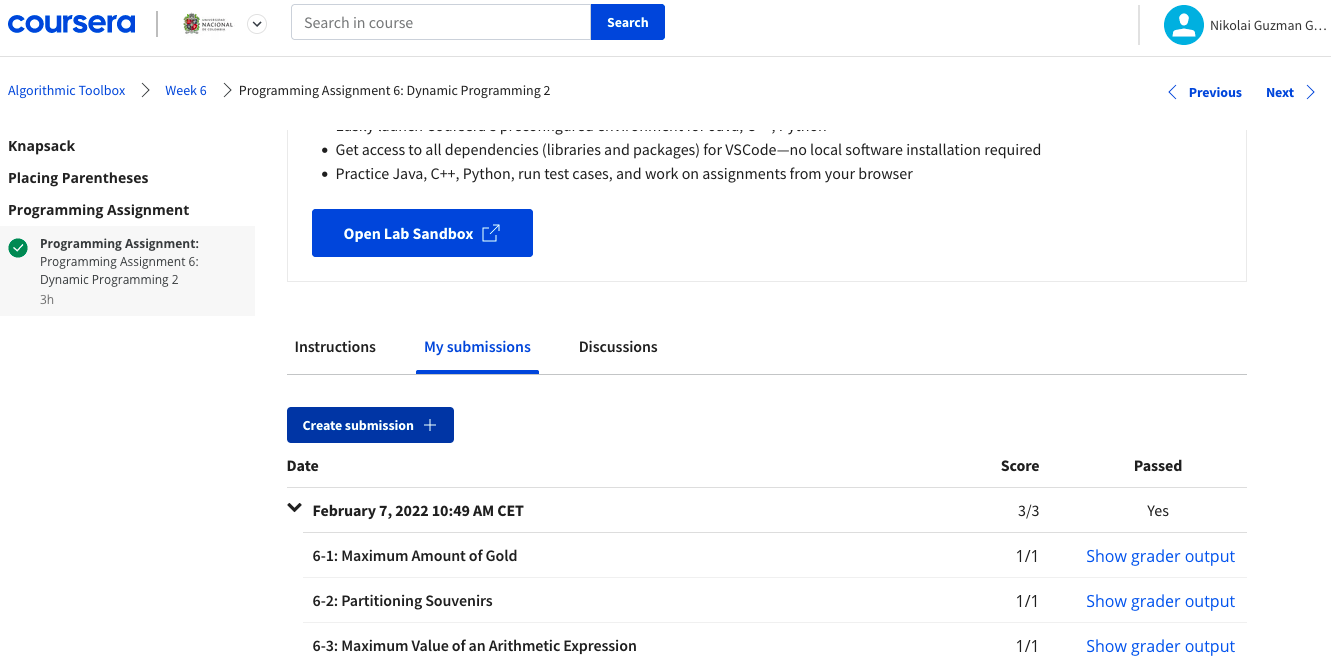